# Data Exploration

This dataset classifies people described by a set of attributes as good or bad credit risks. Two datasets are provided.  the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric".  This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables.   Several attributes that are ordered categorical (such as attribute 17) have been coded as integer.    This was the form used by StatLog.

##  Import library 

In [1]:
# import necessary packages
import keras
import os
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier #
import math
from mlxtend.preprocessing import minmax_scaling

import pandas as pd
import numpy as np
import datetime

# Plots
import seaborn as sns
sns.set()
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

import sys

from collections import Counter
from sklearn.inspection import permutation_importance

from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids

In [2]:
from visualization_german import boxplot_features, box_plot, distribution_plot, missing_percentage, missing_plot, corr_matrix

## Import Data

In [3]:
#Execute the following command to import the dataset:
df = pd.read_csv('../dataset/credit_german/german.data',header = None,delim_whitespace = True)

## Describe the data

Now, we will understand the format of data

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(1000, 21)

In [6]:
#assigning columns names to data varible
df.columns = ["chek_acc","mon","credit_his","purpose","Credit_amo","saving_amo","Pre_employ","instalrate","p_status","guatan","pre_res","property","age","installment","Housing","existing_cards","job","no_people","telephn","for_work","status"]

In [7]:
df.dtypes #knowledge of data type helps for computation

chek_acc          object
mon                int64
credit_his        object
purpose           object
Credit_amo         int64
saving_amo        object
Pre_employ        object
instalrate         int64
p_status          object
guatan            object
pre_res            int64
property          object
age                int64
installment       object
Housing           object
existing_cards     int64
job               object
no_people          int64
telephn           object
for_work          object
status             int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   chek_acc        1000 non-null   object
 1   mon             1000 non-null   int64 
 2   credit_his      1000 non-null   object
 3   purpose         1000 non-null   object
 4   Credit_amo      1000 non-null   int64 
 5   saving_amo      1000 non-null   object
 6   Pre_employ      1000 non-null   object
 7   instalrate      1000 non-null   int64 
 8   p_status        1000 non-null   object
 9   guatan          1000 non-null   object
 10  pre_res         1000 non-null   int64 
 11  property        1000 non-null   object
 12  age             1000 non-null   int64 
 13  installment     1000 non-null   object
 14  Housing         1000 non-null   object
 15  existing_cards  1000 non-null   int64 
 16  job             1000 non-null   object
 17  no_people       1000 non-null   int64 
 18  telephn  

In [9]:
df.describe()

,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

Features in the dataset

In [10]:
features = [i for i in df.columns]

In [11]:
# checking for null values
df.isnull().sum()

chek_acc          0
mon               0
credit_his        0
purpose           0
Credit_amo        0
saving_amo        0
Pre_employ        0
instalrate        0
p_status          0
guatan            0
pre_res           0
property          0
age               0
installment       0
Housing           0
existing_cards    0
job               0
no_people         0
telephn           0
for_work          0
status            0
dtype: int64

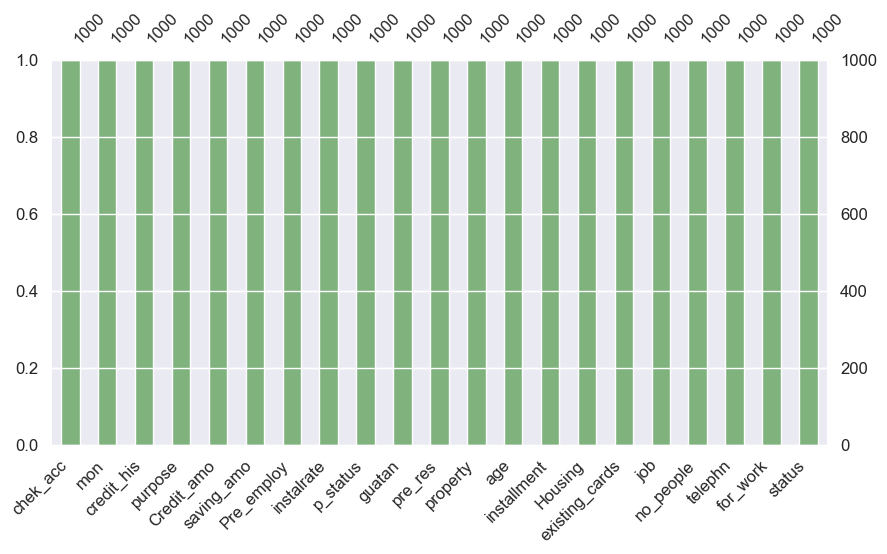

In [12]:
missing_plot(df)

There is no missing data in the entire dataset

# Visualization

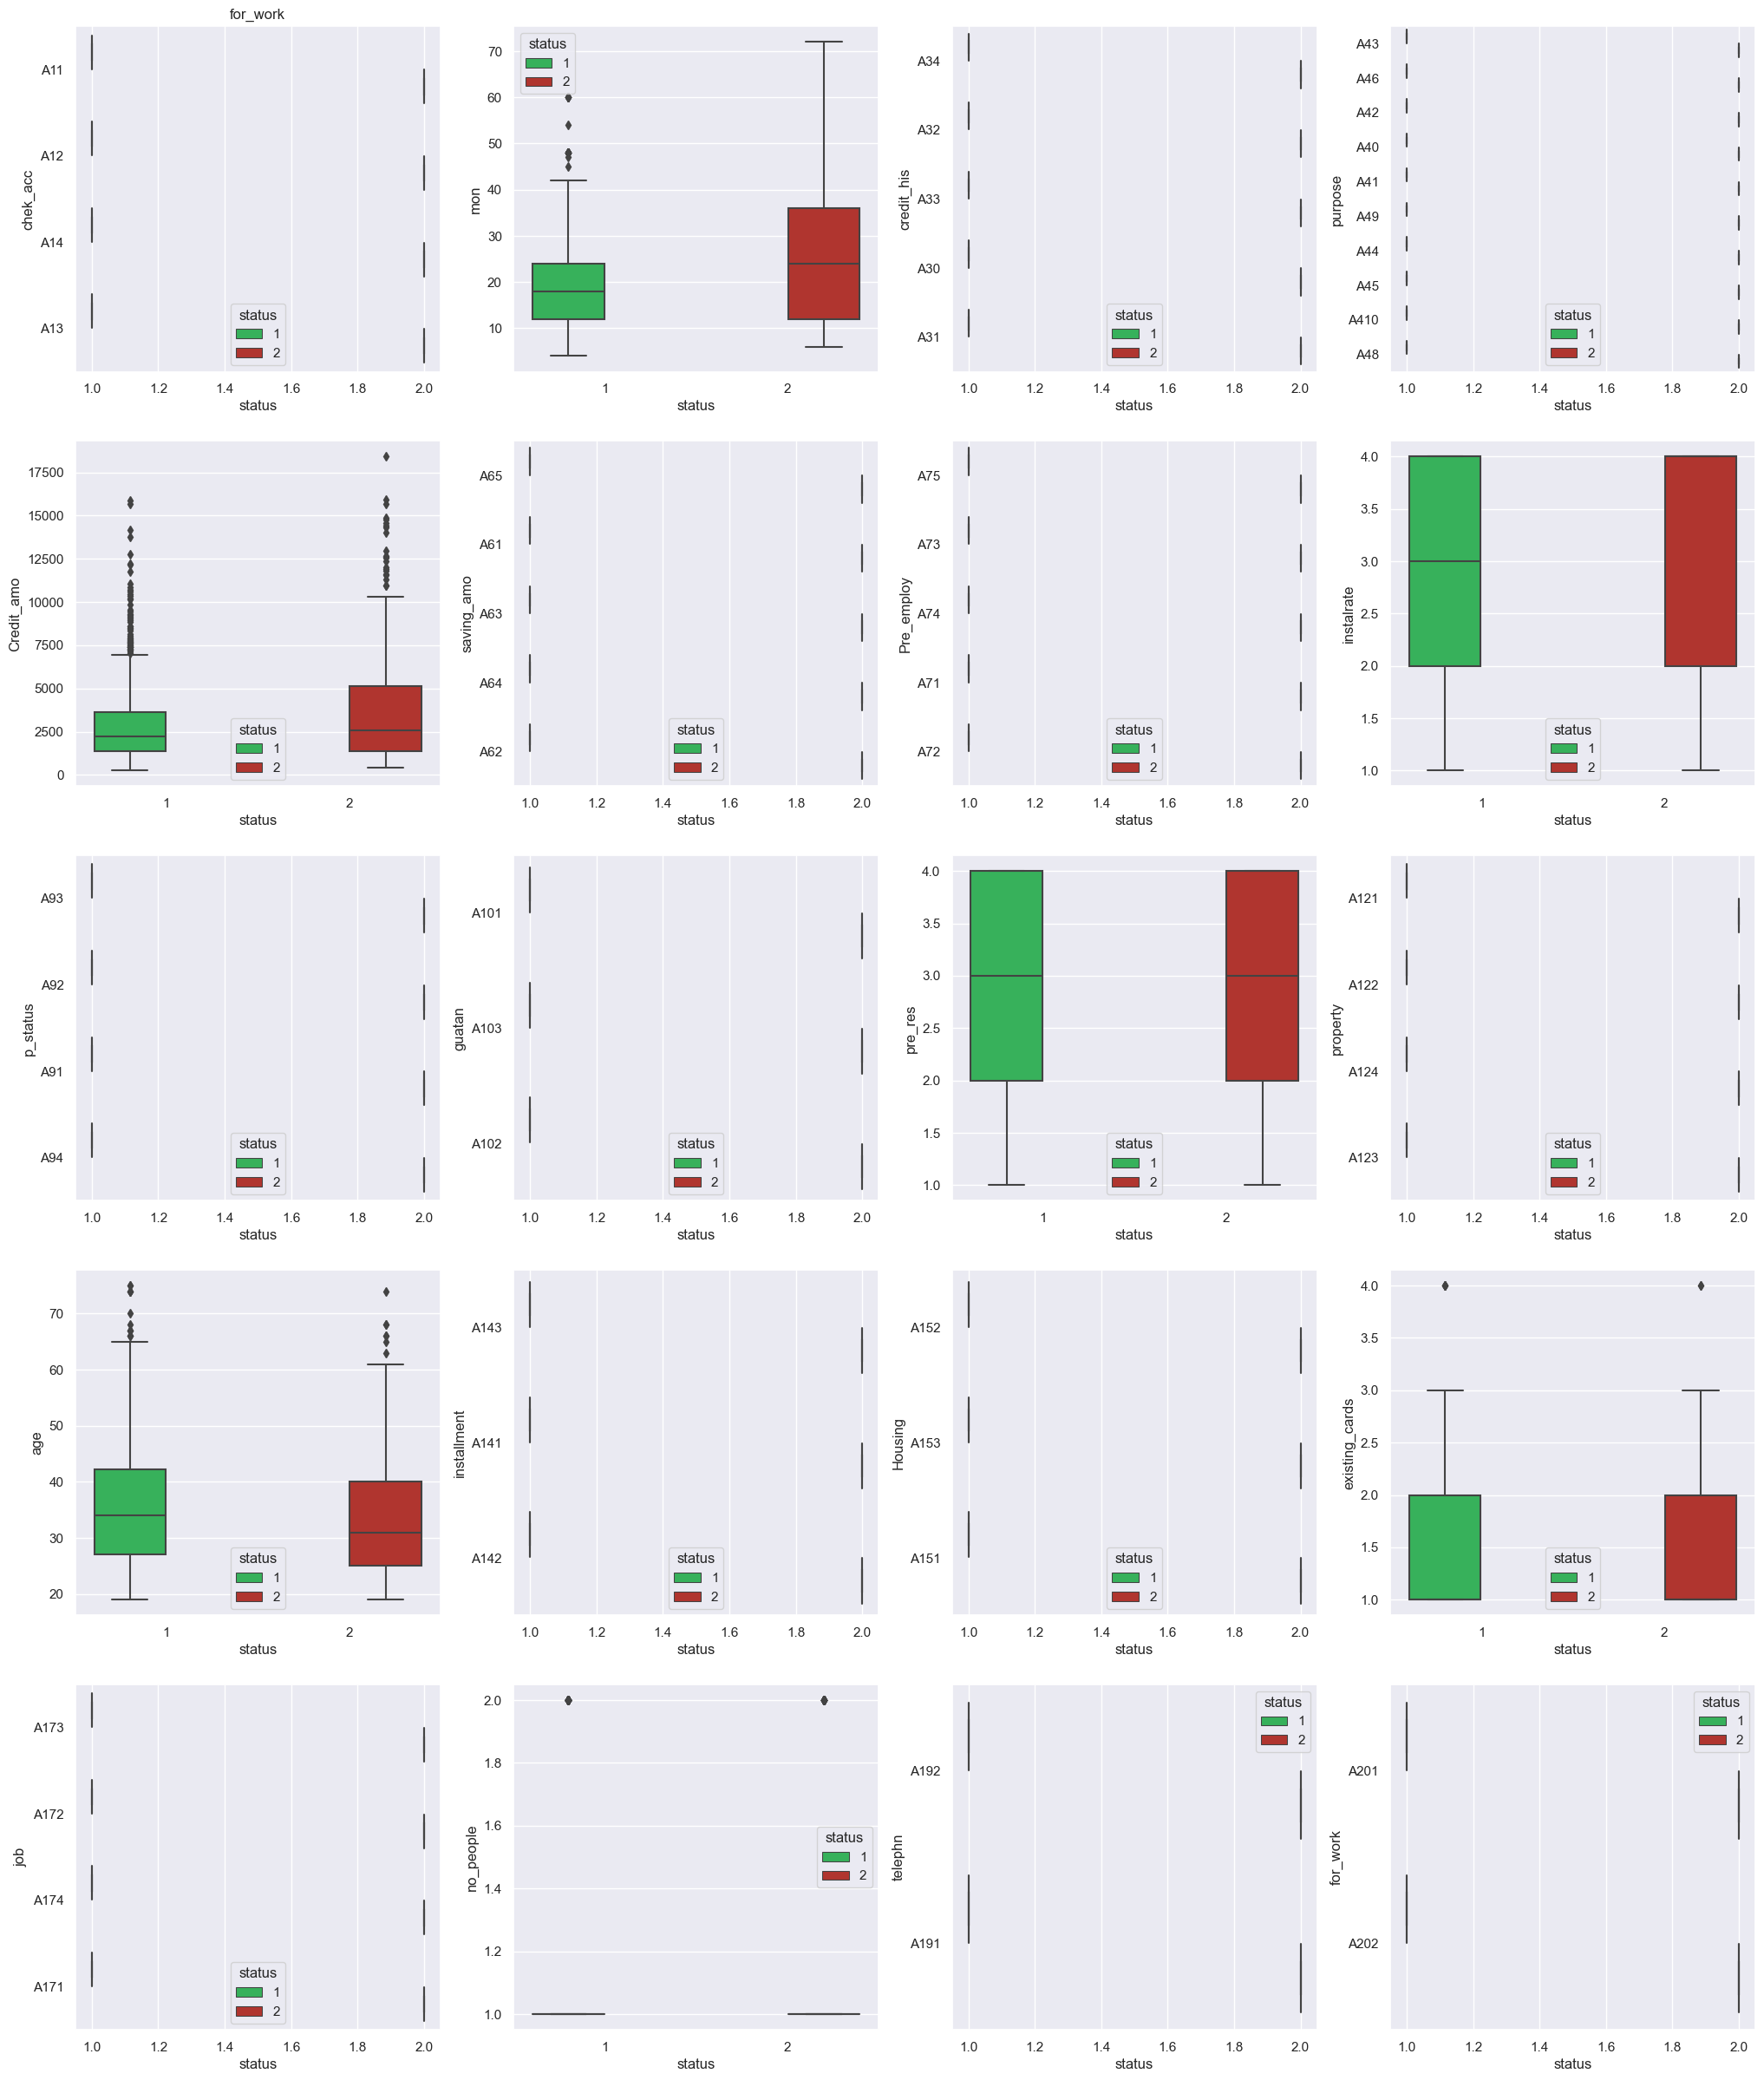

In [13]:
boxplot_features(df)

## Correlation matrix 

C:\Users\nphan\OneDrive - Cesi\Documents\Stage_GridSearch\Clean_code\src\visualization_german.py:27: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 3000x2000 with 0 Axes>

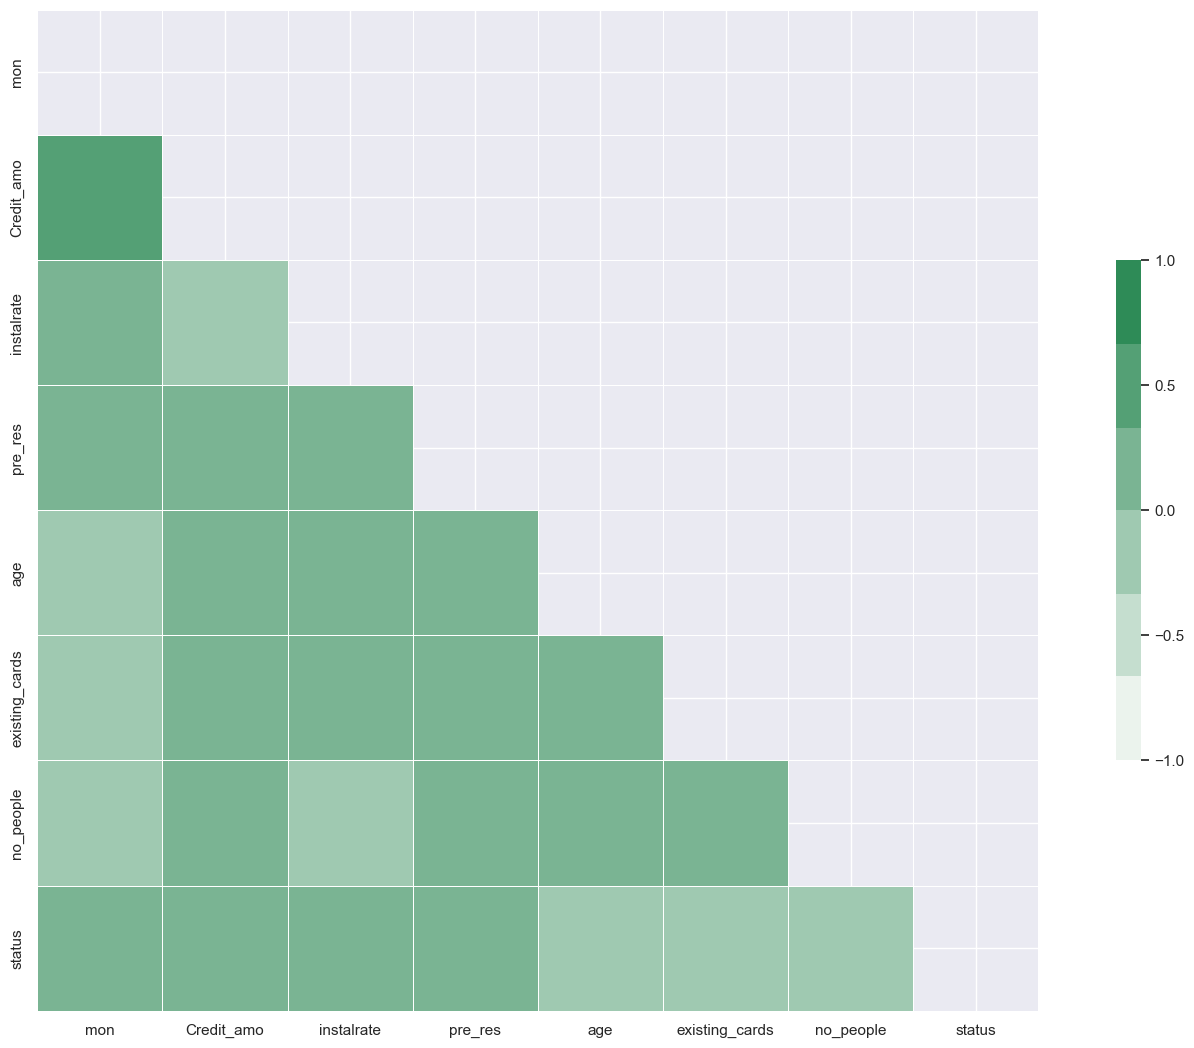

In [14]:
# does not create a copy the dataframe
categorical_features = df.iloc[:,[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18,19]].columns
subset = df.columns.difference(categorical_features)

df_visualization = df.drop_duplicates(subset=subset)
corr_matrix(df_visualization)

## One-hot encoding for categorical variables

In [15]:
# Class label to category
df['status'] = df['status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   chek_acc        1000 non-null   object  
 1   mon             1000 non-null   int64   
 2   credit_his      1000 non-null   object  
 3   purpose         1000 non-null   object  
 4   Credit_amo      1000 non-null   int64   
 5   saving_amo      1000 non-null   object  
 6   Pre_employ      1000 non-null   object  
 7   instalrate      1000 non-null   int64   
 8   p_status        1000 non-null   object  
 9   guatan          1000 non-null   object  
 10  pre_res         1000 non-null   int64   
 11  property        1000 non-null   object  
 12  age             1000 non-null   int64   
 13  installment     1000 non-null   object  
 14  Housing         1000 non-null   object  
 15  existing_cards  1000 non-null   int64   
 16  job             1000 non-null   object  
 17  no_people      

In [16]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['status'])
 
df['status'] = label
 
# printing Dataframe
df.head()
df.shape

(1000, 21)

In [17]:
# Set 'category' type to categorical attributes
for att in categorical_features:
    df[att] = df[att].astype('category')

# Create a new DataFrame to store the one-hot encoded features
df_encoded = df.copy()

# Loop through each feature and perform one-hot encoding
for att in categorical_features:
    # Perform one-hot encoding for the current feature
    df_encoded = pd.concat([pd.get_dummies(df_encoded[att], prefix=att), df_encoded], axis=1)

    # Drop the original column after one-hot encoding
    df_encoded.drop([att], axis=1, inplace=True)
    
df_encoded.head()

,for_work_A201,for_work_A202,telephn_A191,telephn_A192,job_A171,job_A172,job_A173,job_A174,Housing_A151,Housing_A152,...,chek_acc_A13,chek_acc_A14,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people,status
0,1,0,0,1,0,0,1,0,0,1,...,0,0,6,1169,4,4,67,2,1,0
1,1,0,1,0,0,0,1,0,0,1,...,0,0,48,5951,2,2,22,1,1,1
2,1,0,1,0,0,1,0,0,0,1,...,0,1,12,2096,2,3,49,1,2,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,42,7882,2,4,45,1,2,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,24,4870,3,4,53,2,2,1


In [18]:
df_encoded.shape

(1000, 62)

In [19]:
features = df_encoded.columns
features
# print(features)
# f, axes = plt.subplots(round(len(features)/10), 6, figsize = (25,30))  
# y_axe= 0
# for name in features[:-1]:
#     i, j = divmod(y_axe, 4)
#     sns.boxplot(x=df[name], ax=axes[i, j], color =colors_palette3[0])
#     y_axe = y_axe + 1
# plt.tight_layout()
# plt.show()

Index(['for_work_A201', 'for_work_A202', 'telephn_A191', 'telephn_A192',
       'job_A171', 'job_A172', 'job_A173', 'job_A174', 'Housing_A151',
       'Housing_A152', 'Housing_A153', 'installment_A141', 'installment_A142',
       'installment_A143', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'guatan_A101', 'guatan_A102', 'guatan_A103',
       'p_status_A91', 'p_status_A92', 'p_status_A93', 'p_status_A94',
       'Pre_employ_A71', 'Pre_employ_A72', 'Pre_employ_A73', 'Pre_employ_A74',
       'Pre_employ_A75', 'saving_amo_A61', 'saving_amo_A62', 'saving_amo_A63',
       'saving_amo_A64', 'saving_amo_A65', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'credit_his_A30', 'credit_his_A31', 'credit_his_A32', 'credit_his_A33',
       'credit_his_A34', 'chek_acc_A11', 'chek_acc_A12', 'chek_acc_A13',
       'chek_acc_A14', 'mon', 'Credit_amo

 ## Split data set to train set and test set 

In [20]:
# from preprocessing_german import split_data
from visualization_german import split_plot

In [21]:
def split_data(df):
    '''Split a dataset into train and test sets'''
    # split into input (X) and an output (Y)
    X = df.drop(columns=['status'])
    y = df['status']
     # Call train_test_split with the `stratify` parameter
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True,stratify=y)
    return X_train, X_test, y_train, y_test

In [22]:
# Call train_test_split with the `stratify` parameter
X_train, X_test, y_train, y_test = split_data(df_encoded)

In [23]:
y_train_vals = y_train.value_counts()
y_test_vals = y_test.value_counts()

In [24]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Good clients (y=0): {y_train_vals[0]}")
print(f" + Bad clients (y=1):\t {y_train_vals[1]}")

print("Test set:")
print(f" + Good clients (y=0): {y_test_vals[0]}")
print(f" + Bad clients (y=1):\t {y_test_vals[1]}")

(800, 61)
(200, 61)
Training set:
 + Good clients (y=0): 560
 + Bad clients (y=1):	 240
Test set:
 + Good clients (y=0): 140
 + Bad clients (y=1):	 60


<b> Using stratify for target </b>

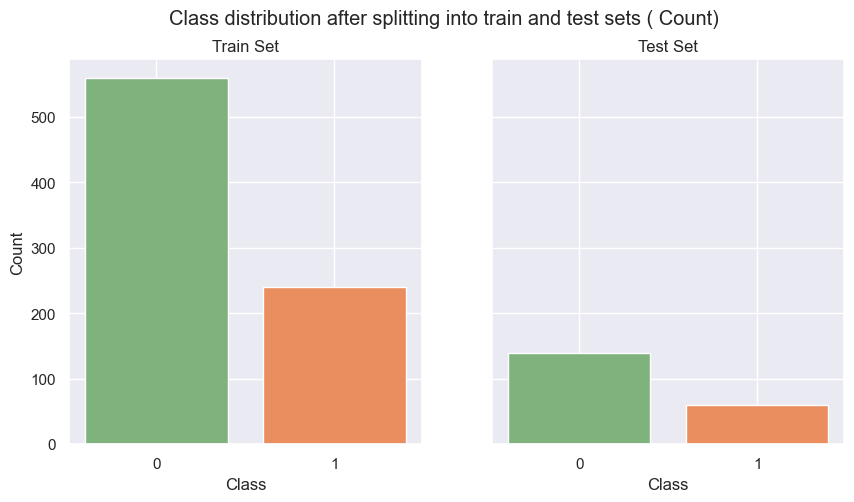

In [25]:
split_plot( y_train,y_test)

This change ensures that the train and test sets follow the same distribution as our original dataset.

## Feature selection 

In [26]:
def plot_color_label_before(data, target):
    well_name = "RANDOM"
    highlight_colour = '#d95f02'
    non_highlight_colour = '#768493'

    data['colours'] = data['name'].apply(lambda x: highlight_colour if x == well_name else non_highlight_colour)


    data = data.sort_values(by='score')

    fig, ax = plt.subplots(figsize=(30,15))

    bars = plt.barh(data['name'], data['score'], height=0.7, color=data['colours'])

    ax.spines[['right', 'top', 'bottom']].set_visible(False) 
    ax.xaxis.set_visible(False)
    ax.yaxis.set_tick_params(labelsize=10)

    ax.bar_label(bars, padding=-45, color='white', 
                 fontsize=8, label_type='edge', fmt='%.3f%%',
                fontweight='bold')
    ax.set_title('Feature Importance', fontsize=16,
                  fontweight='bold', pad=20)
    plt.savefig("../img/randomfeature_german.png")
    plt.show()
    

In [27]:
#for Pearson correlation
X_train_RF = X_train.copy()
X_test_RF = X_test.copy()

In [28]:
print(np.shape(X_train_RF))

(800, 61)


<h4> Built-in Scikit-learn Method With A Random Feature </h4>

In [29]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train.values.ravel())

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=False, inplace=True)

In [30]:
global_importances_random

Credit_amo       0.089206
RANDOM           0.075975
mon              0.073708
age              0.067510
chek_acc_A14     0.048340
                   ...   
for_work_A202    0.003246
job_A171         0.002915
purpose_A44      0.001784
purpose_A48      0.000949
purpose_A410     0.000776
Length: 62, dtype: float64

In [31]:
df_score = pd.DataFrame({'name':global_importances_random.index, 'score':global_importances_random.values})

In [32]:
df_score.to_markdown

<bound method DataFrame.to_markdown of              name     score
0      Credit_amo  0.089206
1          RANDOM  0.075975
2             mon  0.073708
3             age  0.067510
4    chek_acc_A14  0.048340
..            ...       ...
57  for_work_A202  0.003246
58       job_A171  0.002915
59    purpose_A44  0.001784
60    purpose_A48  0.000949
61   purpose_A410  0.000776

[62 rows x 2 columns]>

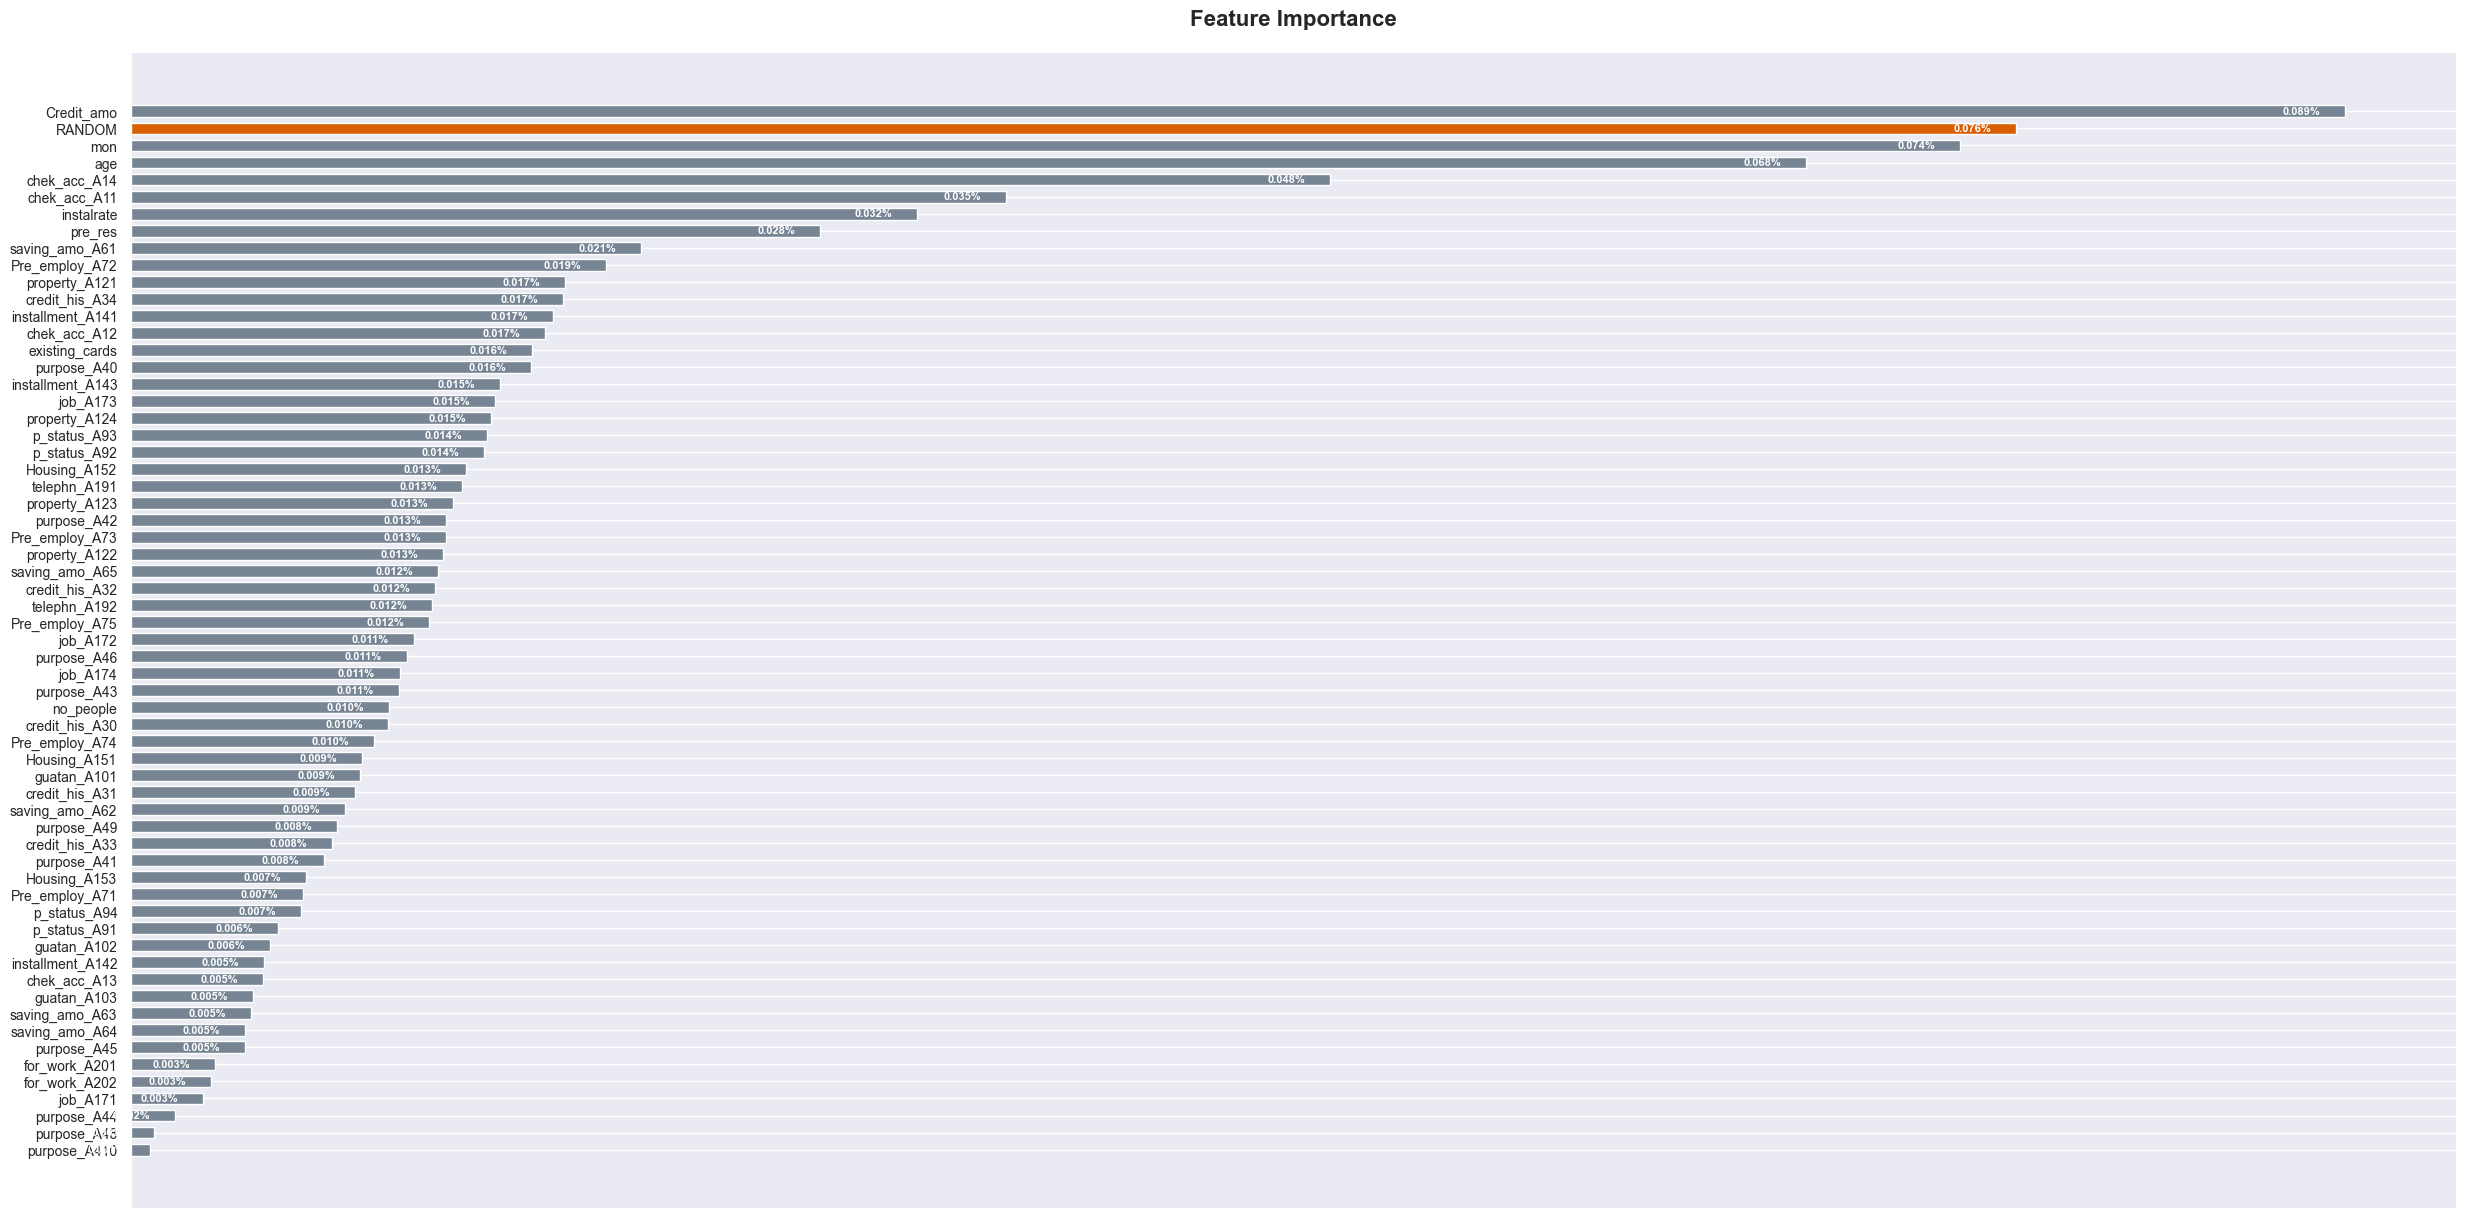

In [33]:
plot_color_label_before(df_score, 'RANDOM')

In [34]:
df_score.index[df_score['name']=='RANDOM'].tolist()

[1]

<h4> Permutation Feature Importance ((Better, but slower) </h4>

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Clean data
sorted_idx = result.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=result.importances[sorted_idx].T, columns=X_test.columns[sorted_idx])

# perm_importances = result.importances_mean
# perm_std = result.importances_std
# sorted_idx = perm_importances.argsort()
# feature_names = X_test.columns

# df_score2 = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

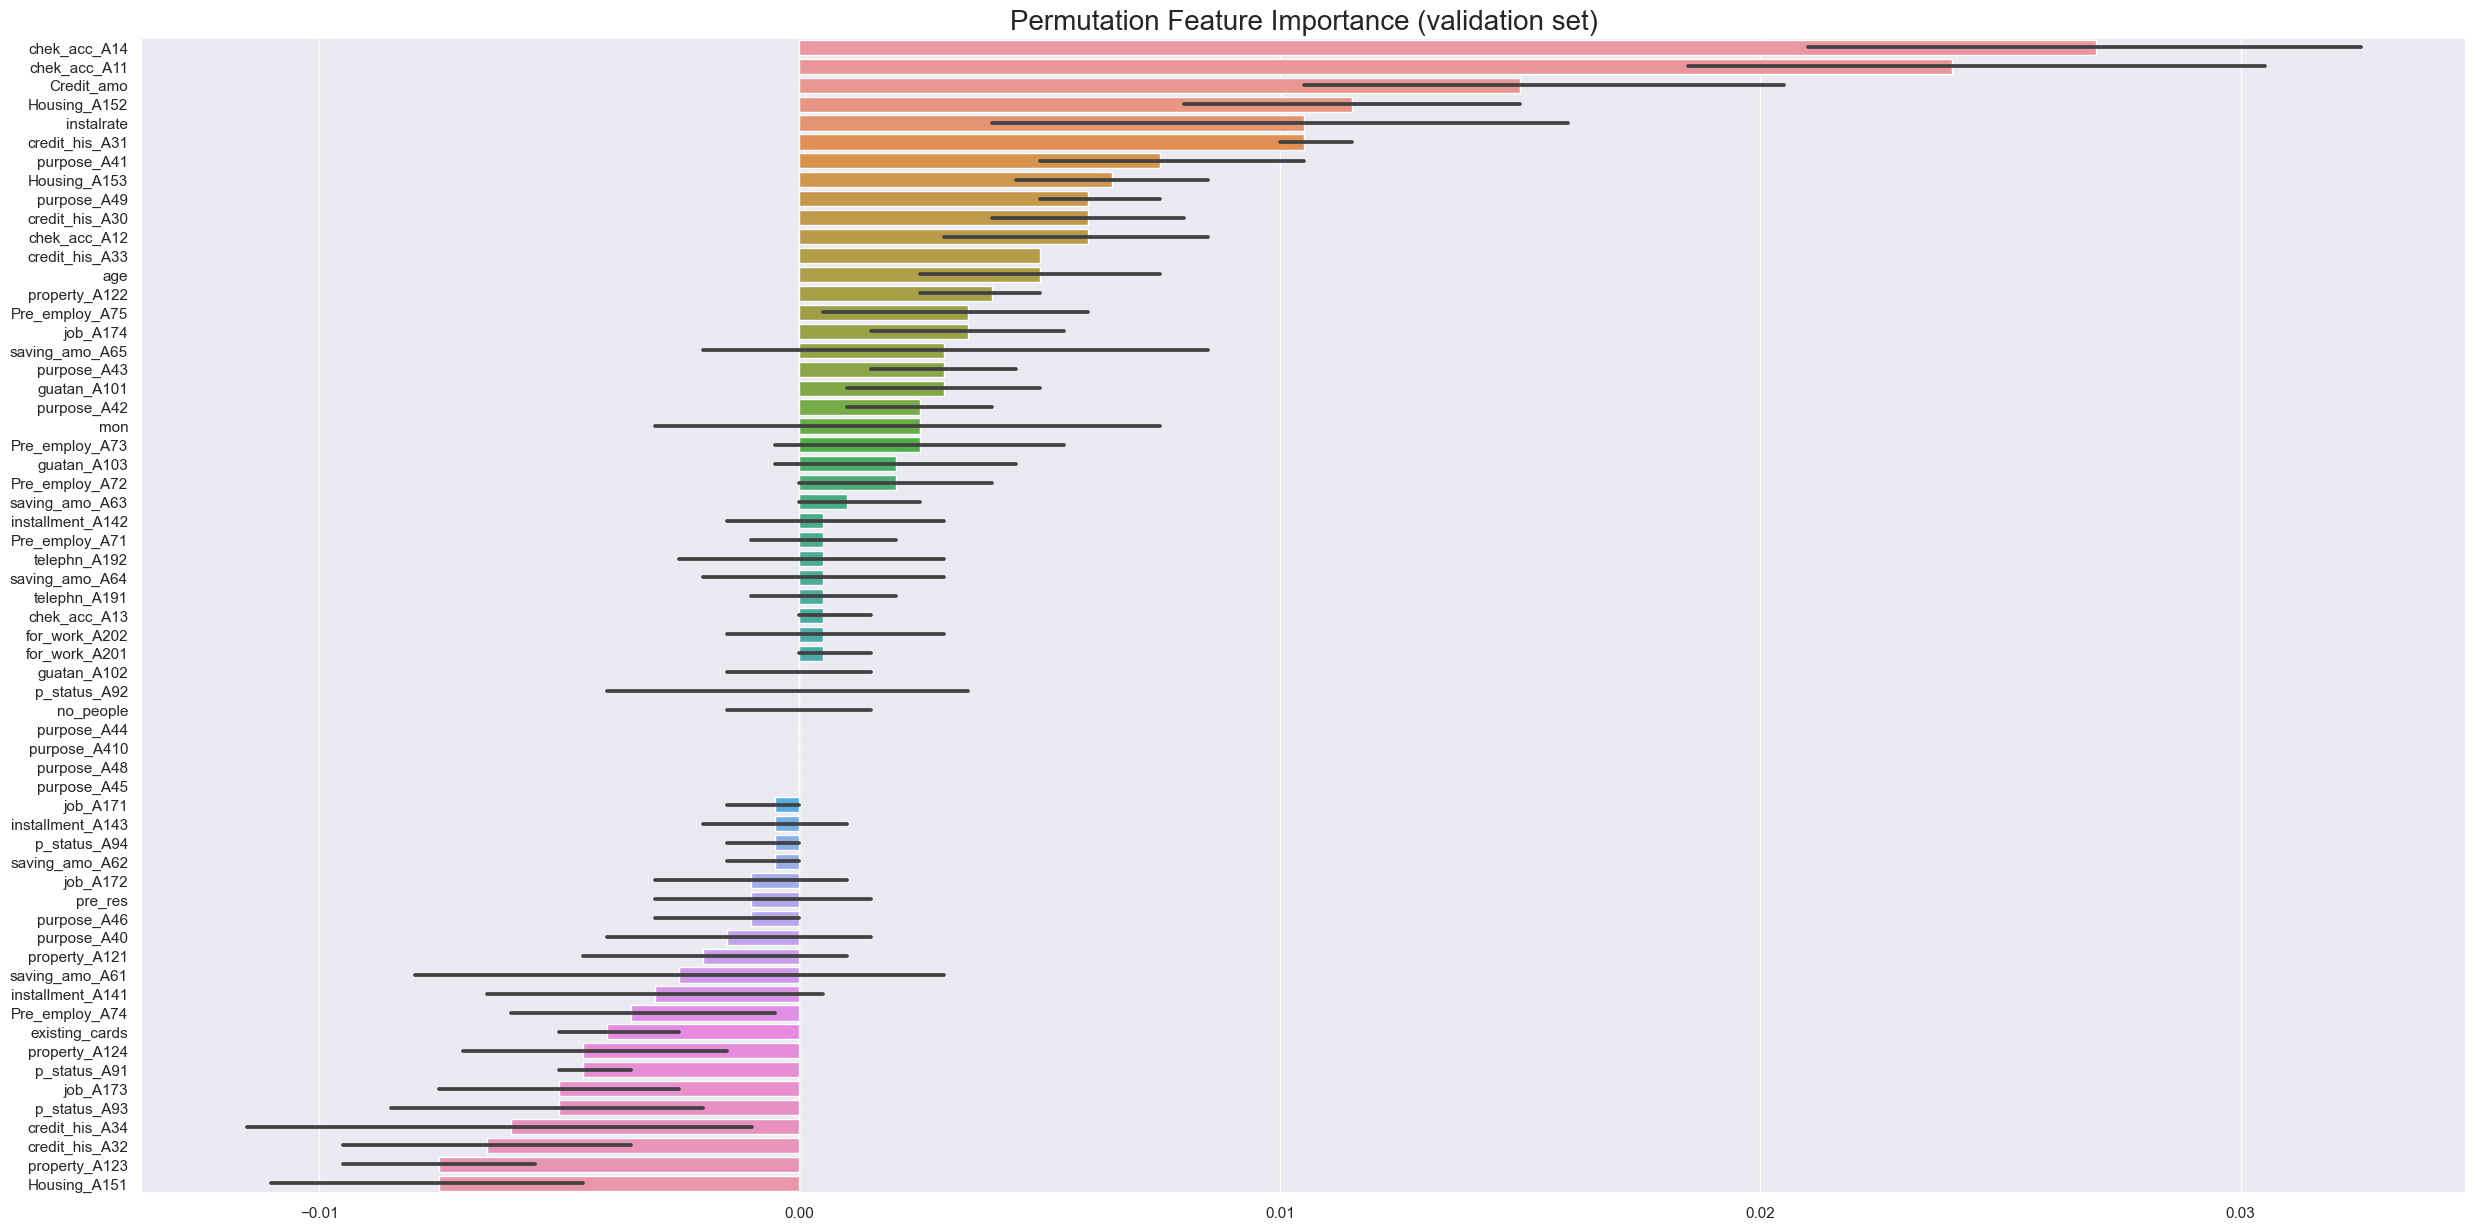

In [36]:
# Plot (This can be barplot, boxplot, violinplot,...)
plt.figure(figsize=(30,15))
sns.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (validation set)",  fontsize=20)
plt.savefig("../img/permutationfeature_german.png")

<h4>Random Forest Feature Importance With SHAP </h4>

In [37]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [38]:
# load JS visualization code to notebook
shap.initjs()

In [39]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.7017625 0.2982375]


In [40]:
# Shap Values for class =0 that is  class
print("Shap Values for '0' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for '0' class


,for_work_A201,for_work_A202,telephn_A191,telephn_A192,job_A171,job_A172,job_A173,job_A174,Housing_A151,Housing_A152,...,chek_acc_A12,chek_acc_A13,chek_acc_A14,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people
0,-0.000953,-0.001976,-0.002130,-0.013177,-0.000272,0.000194,-0.006988,-0.002082,0.003487,-0.011304,...,-0.006178,-0.001579,-0.064725,-0.063447,-0.059714,-0.020980,-0.006209,-0.013905,-0.002195,-0.003931
1,-0.000482,-0.000255,-0.003509,-0.003317,0.000193,0.002236,0.004507,0.000654,0.004281,0.012389,...,0.014638,-0.000519,0.091425,0.023125,-0.011102,-0.008530,0.004437,0.012667,0.002182,0.005548
2,-0.000600,-0.001289,0.002943,-0.000009,-0.000226,-0.000888,-0.001419,0.001813,0.004963,0.008484,...,0.010392,-0.000211,-0.034297,-0.055408,0.009519,-0.002320,0.007041,0.024871,-0.000019,-0.003735
3,-0.000898,-0.000195,0.003963,0.005200,0.006436,0.003942,0.003691,0.003234,0.010970,0.009287,...,0.000777,-0.001273,-0.027342,-0.033130,0.026807,0.003512,0.001821,0.013486,0.003105,0.001514
4,-0.000724,-0.000941,0.005975,0.004852,-0.000049,0.001586,0.006092,0.004142,0.007339,0.004115,...,-0.005503,0.000634,-0.039294,-0.036675,-0.025885,0.030791,0.001546,-0.025881,0.000664,-0.000147


In [41]:
# Shap Values for class =1 that is  class
print("Shap Values for '1' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for '1' class


,for_work_A201,for_work_A202,telephn_A191,telephn_A192,job_A171,job_A172,job_A173,job_A174,Housing_A151,Housing_A152,...,chek_acc_A12,chek_acc_A13,chek_acc_A14,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people
0,0.000953,0.001976,0.002130,0.013177,0.000272,-0.000194,0.006988,0.002082,-0.003487,0.011304,...,0.006178,0.001579,0.064725,0.063447,0.059714,0.020980,0.006209,0.013905,0.002195,0.003931
1,0.000482,0.000255,0.003509,0.003317,-0.000193,-0.002236,-0.004507,-0.000654,-0.004281,-0.012389,...,-0.014638,0.000519,-0.091425,-0.023125,0.011102,0.008530,-0.004437,-0.012667,-0.002182,-0.005548
2,0.000600,0.001289,-0.002943,0.000009,0.000226,0.000888,0.001419,-0.001813,-0.004963,-0.008484,...,-0.010392,0.000211,0.034297,0.055408,-0.009519,0.002320,-0.007041,-0.024871,0.000019,0.003735
3,0.000898,0.000195,-0.003963,-0.005200,-0.006436,-0.003942,-0.003691,-0.003234,-0.010970,-0.009287,...,-0.000777,0.001273,0.027342,0.033130,-0.026807,-0.003512,-0.001821,-0.013486,-0.003105,-0.001514
4,0.000724,0.000941,-0.005975,-0.004852,0.000049,-0.001586,-0.006092,-0.004142,-0.007339,-0.004115,...,0.005503,-0.000634,0.039294,0.036675,0.025885,-0.030791,-0.001546,0.025881,-0.000664,0.000147


In [42]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [43]:
#Force Plot for a single observation for a single class 3
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

In [44]:
X_train.shape

(800, 61)

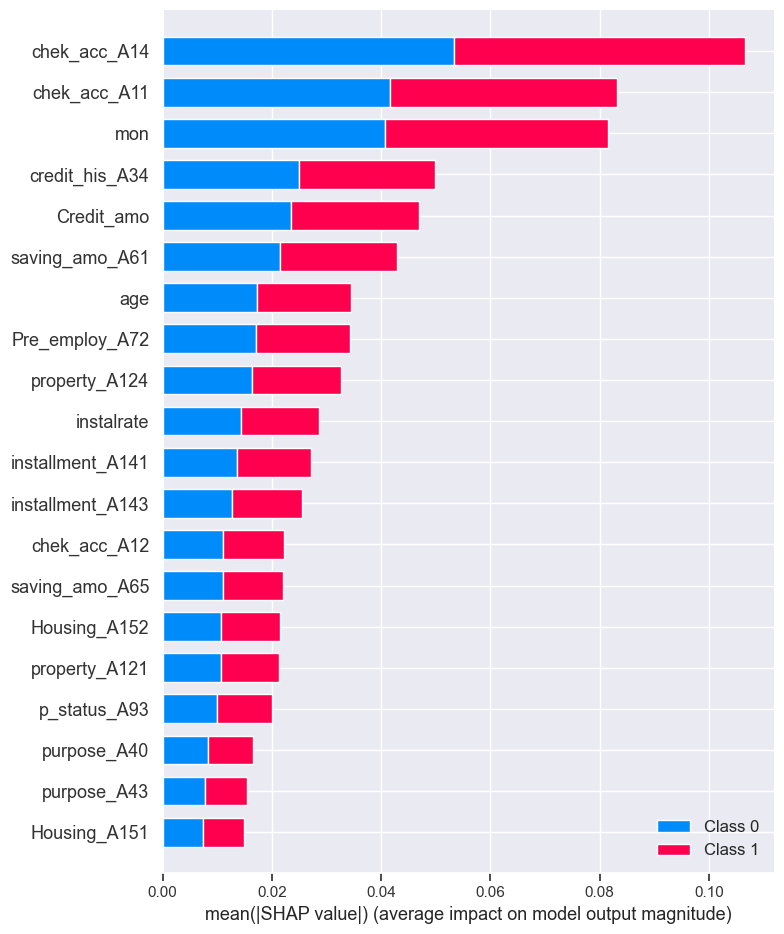

In [45]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


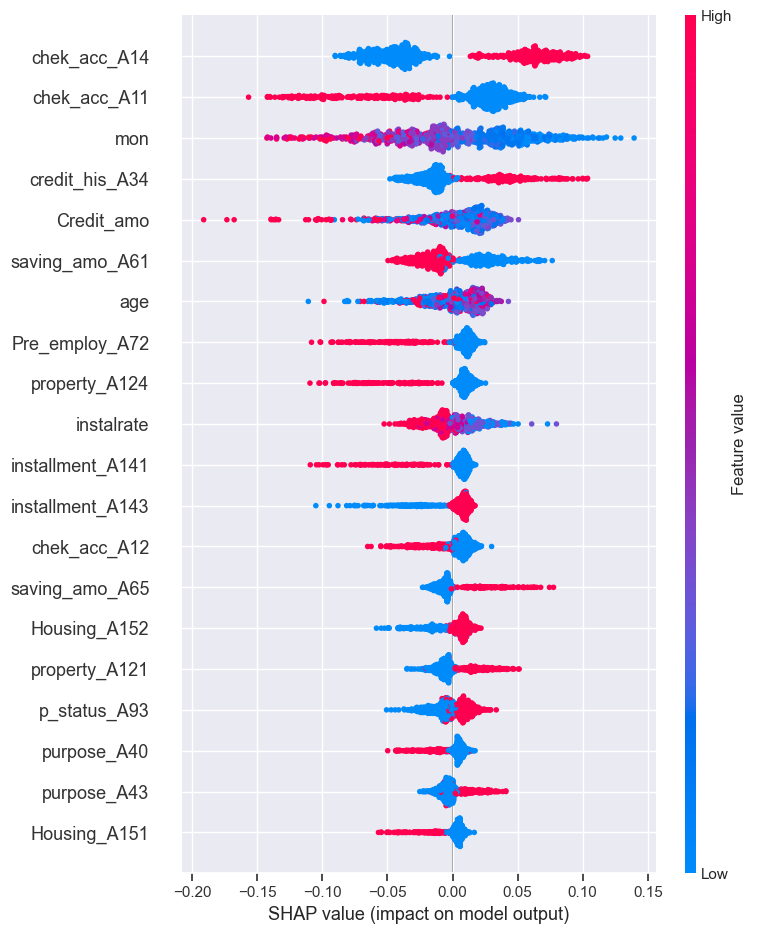

In [46]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

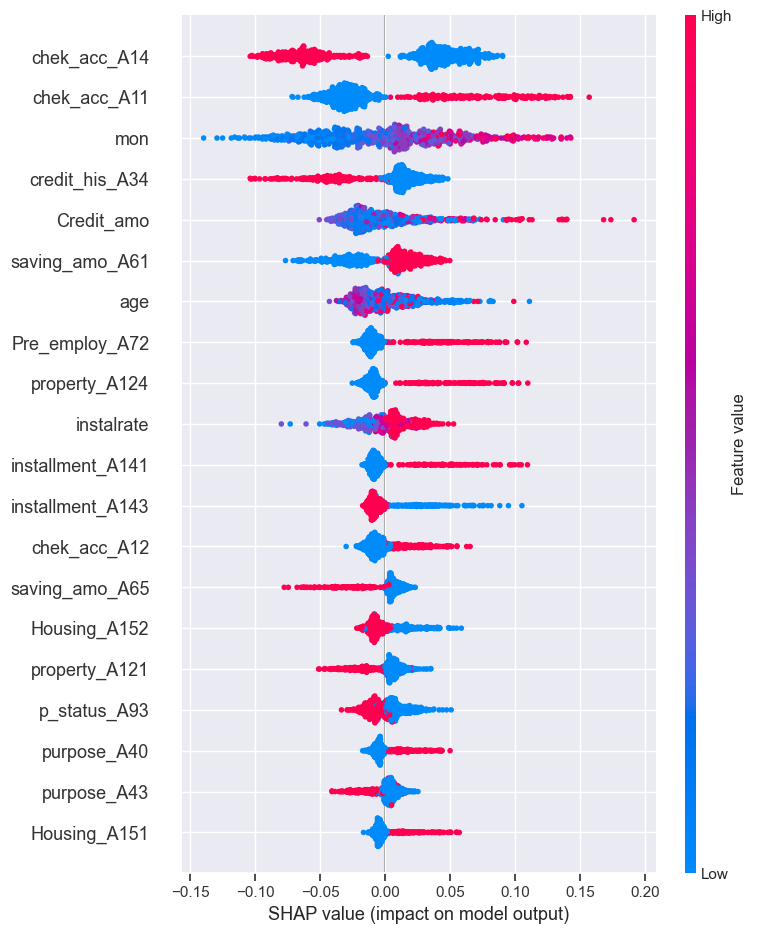

In [47]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

The code isn't too complex. But there are a few caveats.

When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".
Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.
This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

In [48]:
cols_name =pfi_df.columns[:20]
cols_name

Index(['chek_acc_A14', 'chek_acc_A11', 'Credit_amo', 'Housing_A152',
       'instalrate', 'credit_his_A31', 'purpose_A41', 'Housing_A153',
       'purpose_A49', 'credit_his_A30', 'chek_acc_A12', 'credit_his_A33',
       'age', 'property_A122', 'Pre_employ_A75', 'job_A174', 'saving_amo_A65',
       'purpose_A43', 'guatan_A101', 'purpose_A42'],
      dtype='object')

In [49]:
X_train_RF = X_train.drop(columns=X_train.columns.difference(cols_name))
X_test_RF = X_test.drop(columns=X_test.columns.difference(cols_name))

In [50]:
X_train_RF.shape

(800, 20)

In [51]:
X_test_RF.shape

(200, 20)

## Data Scaling 

In [52]:
# sc_X = MinMaxScaler()
sc_X = StandardScaler()

Data Scaling for 30 features dataset

In [53]:
# X_train_RF_standardized = sc_X.fit_transform(X_train_RF_s)
X_train_RF_standardized = sc_X.fit_transform(X_train_RF)
X_test_RF_standardized = sc_X.transform(X_test_RF)

## Sampling ( SMOTETomek)

In [54]:
print("Shape of the X_train before applying SMOTEENN is: ", X_train_RF_standardized .shape)
print("Shape of the y_train data before applying SMOTEENN is: ", y_train.shape)
print("Shape of the X_test before applying SMOTEENN is: ", X_test_RF_standardized.shape)
print("Shape of the y_test before applying SMOTEENN is: ", y_test.shape)
print()
print("Before applying SMOTEENN the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTEENN the count of the non-fraud cases are: ", y_train.value_counts().values[0])
print("Before applying SMOTEENN the percentage of the fraud cases are: ", sum(y_train == 1)/ len(y_train) * 100.0)
print("Before applying SMOTEENN the percentage of the non-fraud cases are: ", sum(y_train == 0)/ len(y_train) * 100.0)
print("Original dataset shape %s" % Counter(y_train))


sm =SMOTETomek(random_state=42)

X_train_RF_s, y_train_RF_s = sm.fit_resample(X_train_RF_standardized, y_train)

print("Shape of the X_train after applying SMOTEENN is: ", X_train_RF_s.shape)
print("Shape of the y_train data after applying SMOTEENN is: ", y_train_RF_s.shape)
print()
print("After applying SMOTEENN the count of the fraud cases are: ", sum(y_train_RF_s == 1))
print("After applying SMOTEENN the count of the non-fraud cases are: ", sum(y_train_RF_s == 0))
print("After applying SMOTEENN the percentage of the fraud cases are: ", sum(y_train_RF_s == 1)/ len(y_train_RF_s) * 100.0)
print("After applying SMOTEENN the percentage of the non-fraud cases are: ", sum(y_train_RF_s == 0)/ len(y_train_RF_s) * 100.0)

print("Resampled dataset shape %s" % Counter(y_train_RF_s))

Shape of the X_train before applying SMOTEENN is:  (800, 20)
Shape of the y_train data before applying SMOTEENN is:  (800,)
Shape of the X_test before applying SMOTEENN is:  (200, 20)
Shape of the y_test before applying SMOTEENN is:  (200,)

Before applying SMOTEENN the count of the fraud cases are:  240
Before applying SMOTEENN the count of the non-fraud cases are:  560
Before applying SMOTEENN the percentage of the fraud cases are:  30.0
Before applying SMOTEENN the percentage of the non-fraud cases are:  70.0
Original dataset shape Counter({0: 560, 1: 240})
Shape of the X_train after applying SMOTEENN is:  (1056, 20)
Shape of the y_train data after applying SMOTEENN is:  (1056,)

After applying SMOTEENN the count of the fraud cases are:  528
After applying SMOTEENN the count of the non-fraud cases are:  528
After applying SMOTEENN the percentage of the fraud cases are:  50.0
After applying SMOTEENN the percentage of the non-fraud cases are:  50.0
Resampled dataset shape Counter({1: 

## Save dataframes

In [56]:
# train set and test set
pd.DataFrame(X_train_RF_s).to_csv('../train_test_set/X_train_german.csv', index=False)
pd.DataFrame(X_test_RF_standardized).to_csv('../train_test_set/X_test_german.csv', index=False)
pd.DataFrame(y_train_RF_s).to_csv('../train_test_set/y_train_german.csv', index=False)
pd.DataFrame(y_test).to_csv('../train_test_set/y_test_german.csv', index=False)